In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import thermal_barrierlife_prediction as tbp

In [38]:
ensemble = tbp.EnsembleEstimator()

In [46]:
ensemble.create_models(
    estimator_args=[
        ('CNN_500', {'data': {}, 'init': {}, 'train': {'epochs': 2000}}),
#         ('CNN_200', {'data': {}, 'init': {}, 'train': {'epochs': 200}}),
    ],
    val_sets=[
        ['M-19-074', 'M-19-104'],
#         ['M-19-267', 'M-19-269'],
#         ['M-19-271', 'M-19-274'],
#         ['M-19-276', 'M-19-280'],
#         ['M-19-282', 'M-19-284'],
        
#         ['M-19-104', 'M-19-267'],
#         ['M-19-269', 'M-19-271'],
#         ['M-19-274', 'M-19-276'],
#         ['M-19-280', 'M-19-282'],
#         ['M-19-074', 'M-19-284'],
    ]
)

Epoch 1/2000
26/26 - 1s - loss: 3739.6018 - mean_squared_error: 3739.6018 - mean_absolute_error: 48.9306 - val_loss: 41.4936 - val_mean_squared_error: 41.4936 - val_mean_absolute_error: 6.3695
Epoch 2/2000
26/26 - 1s - loss: 2821.1797 - mean_squared_error: 2821.1797 - mean_absolute_error: 42.6997 - val_loss: 524.7482 - val_mean_squared_error: 524.7482 - val_mean_absolute_error: 22.7782
Epoch 3/2000
26/26 - 1s - loss: 2335.9512 - mean_squared_error: 2335.9512 - mean_absolute_error: 40.3721 - val_loss: 1104.4357 - val_mean_squared_error: 1104.4357 - val_mean_absolute_error: 32.6468
Epoch 4/2000
26/26 - 1s - loss: 2105.6160 - mean_squared_error: 2105.6160 - mean_absolute_error: 38.8375 - val_loss: 1201.3903 - val_mean_squared_error: 1201.3903 - val_mean_absolute_error: 34.0260
Epoch 5/2000
26/26 - 1s - loss: 2240.8237 - mean_squared_error: 2240.8237 - mean_absolute_error: 38.3774 - val_loss: 4497.5371 - val_mean_squared_error: 4497.5371 - val_mean_absolute_error: 67.0215
Epoch 6/2000
26/2

In [47]:
preds = []
true = []
sample = []
for model in ensemble.estimators['CNN_500']:
    preds.append(model.predict(list(model.val_samples)))
    true.append(model.data['lifetime'][model.val_idx])
    sample.append(model.data['sample'][model.val_idx])
preds = np.concatenate(preds)
true = np.concatenate(true)
sample = np.concatenate(sample)

In [48]:
preds

array([122.92065 , 128.10713 , 117.6371  , 116.28095 , 112.9674  ,
       108.45142 , 116.10364 , 122.9901  , 115.7296  , 119.44545 ,
       124.1565  , 113.49809 , 117.2942  , 112.59458 , 120.50731 ,
       112.774   , 112.38814 , 119.38999 , 120.52855 , 107.16284 ,
       111.35959 , 117.46475 ,  64.77573 , 120.63862 , 120.18953 ,
       102.5626  , 102.75151 , 104.84132 ,  80.30438 ,  88.20332 ,
       101.042435, 111.301384, 113.05589 , 109.34297 , 112.88736 ,
       113.67645 ,  72.68349 , 110.57391 , 103.239914,  68.438995,
        76.49039 , 111.11467 , 111.98668 , 112.68811 , 109.175995,
       123.80327 , 106.55587 , 104.68219 , 104.700874,  97.393166,
       103.69484 ,  96.59737 ,  96.37959 , 113.10467 , 115.38179 ,
       109.41971 , 108.76942 , 118.02394 , 133.15428 , 126.21189 ,
       122.642914, 116.73543 , 112.8032  , 141.1068  ,  90.06496 ,
       112.53927 , 122.214645,  62.906372, 113.02907 , 113.5427  ,
       113.9501  , 118.623146, 119.81872 , 128.51978 ,  86.099

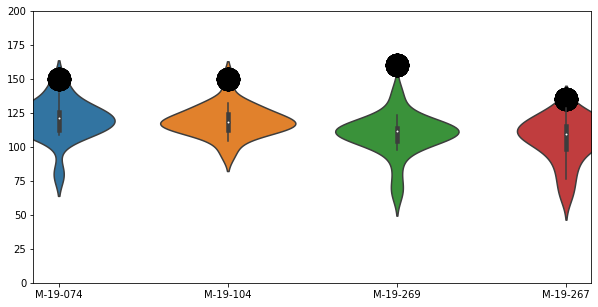

In [49]:
plt.figure(figsize=(10,5))
sns.violinplot(x=sample, y=preds)
# plt.scatter(x=sample, y=preds)
plt.scatter(x=sample, y=true, c='black', s=500)
plt.ylim(0, 200)
plt.show()

In [50]:
ensemble.estimators['CNN_500'][0].compute_gradients_input(
            image_ids=list(ensemble.estimators['CNN_500'][0].data.image_id.values[:10]),
    )

AttributeError: 'dict' object has no attribute 'image_id'

In [ ]:
for model in ensemble.estimators['CNN_500']:
    plt.plot(model.history['mean_absolute_error'], label='train MAE')
    plt.plot(model.history['val_mean_absolute_error'], label='val MAE')
    plt.legend()
    plt.show()

In [ ]:
for model in ensemble.estimators['CNN_500']:
    plt.plot(model.history['mean_squared_error'], label='train MSE')
    plt.plot(model.history['val_mean_squared_error'], label='val MSE')
    plt.legend()
    plt.show()